In [11]:
import networkx as nx
import random as rnd

In [12]:
def prim(g):
    #crea grafica de salida 'resp'
    resp = nx.Graph();
    #agrega el primero
    resp.add_edges_from([selectMinVertex(g)])
    #sigue hasta que todos los nodos esten en resp
    while(set(resp.nodes()) != set(g.nodes())):
        resp.add_edges_from([selectMinConectedVertex(g,resp)])
    return resp

def kruskal(g):
    #crea la grafica resp
    resp = nx.Graph()
    #agrega todos los nodos sin vertives
    resp.add_nodes_from(g.nodes())
    aristas = [(u,v,w) for u,v,w in g.edges(data=True)]
    #sigue hasta que la grafica quede conectada o se acaben los vertices
    while(not nx.is_connected(resp) and len(aristas) > 0):
        minAr = min(aristas, key=lambda t:t[2]['weight'])
        aristas.remove(minAr)
        #aqui se crea una lista de los componentes que contienen a los vertices de la arista minima
        setComps = [i for i in nx.connected_components(resp) if(minAr[0] in set(i) or minAr[1] in set(i))]
        #si la lista contiene 2 cosas los vertices no estan conectados
        if(len(setComps)>1):
            #se agrega la arista
            resp.add_edges_from([minAr])
    return resp
          
def selectMinVertex(g, visited=None):
    if(visited is not None):
        notVisited = set(g.nodes) - set(visited)
    else:
        notVisited = set(g.nodes)
    verts = [(u,v,w) for u,v,w in g.edges(nbunch=notVisited, data=True)]
    return min(verts, key = lambda t: t[2]['weight'])

def selectMinConectedVertex(g, h):
    verts = [(u,v,w) for u,v,w in g.edges(nbunch=h.nodes(), data=True) if((u,v) not in h.edges() and (u not in h.nodes() or v not in h.nodes))]
    return min(verts, key = lambda t: t[2]['weight'])
    

In [13]:
def pintaGrafica(g, labs=None):
    #fija la posicion de los nodos
    ps = nx.spring_layout(g)
    #pinta los nodos con sus nombres
    nx.draw(g, pos=ps ,with_labels=True)
    
    #crea diccionario de edge:weight para poner en las aristas el peso
    ed_labels = { (u,v):w['weight'] for u, v, w in g.edges.data()}
    
    nx.draw_networkx_edge_labels(g, pos=ps, edge_labels=ed_labels)

In [14]:
g = nx.Graph()

In [15]:
g.add_nodes_from((i for i in range (10)))

In [16]:
list(g.nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [17]:
lisEd = [(9,7),(7,8),(8,6),(6,0),(0,2),(0,1),(1,5),(5,3),(5,10),(3,10),(10,4),(7,0),(7,3)];

In [18]:
for edge in lisEd:
    g.add_edge(edge[0], edge[1], weight = rnd.randint(1,9))

In [19]:
for e in g.edges:
    print(str(e) + str(g[e[0]][e[1]]))

(0, 6){'weight': 9}
(0, 2){'weight': 2}
(0, 1){'weight': 3}
(0, 7){'weight': 3}
(1, 5){'weight': 8}
(3, 5){'weight': 5}
(3, 10){'weight': 8}
(3, 7){'weight': 9}
(4, 10){'weight': 2}
(5, 10){'weight': 9}
(6, 8){'weight': 7}
(7, 9){'weight': 5}
(7, 8){'weight': 9}


In [20]:
list(g.edges.data())
ed_labels = {(u,v):w['weight'] for u, v, w in g.edges.data()}
ed_labels

{(0, 6): 9,
 (0, 2): 2,
 (0, 1): 3,
 (0, 7): 3,
 (1, 5): 8,
 (3, 5): 5,
 (3, 10): 8,
 (3, 7): 9,
 (4, 10): 2,
 (5, 10): 9,
 (6, 8): 7,
 (7, 9): 5,
 (7, 8): 9}

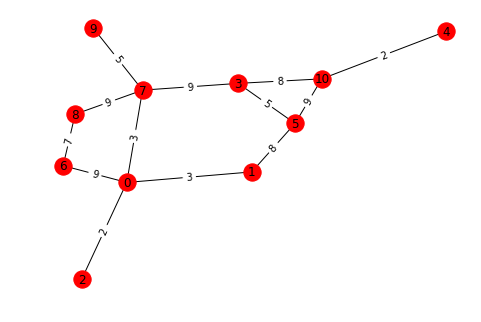

In [28]:
pintaGrafica(g)

In [22]:
selectMinVertex(g)

(0, 2, {'weight': 2})

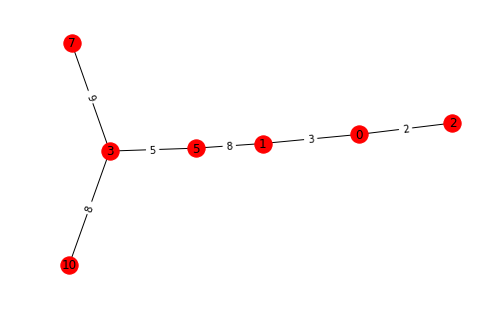

In [23]:
h = nx.Graph()
h.add_edges_from([(u,v,w) for u,v,w in g.edges(nbunch=[1,2,3], data=True)])
pintaGrafica(h)

In [24]:
selectMinConectedVertex(g,h)

(10, 4, {'weight': 2})

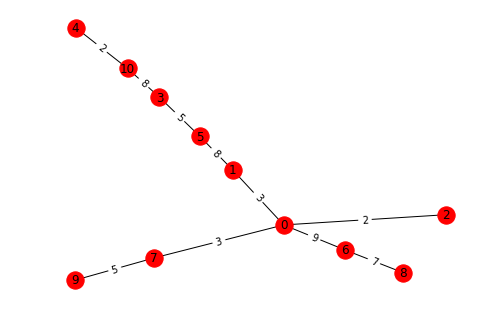

In [32]:
pintaGrafica(prim(g))

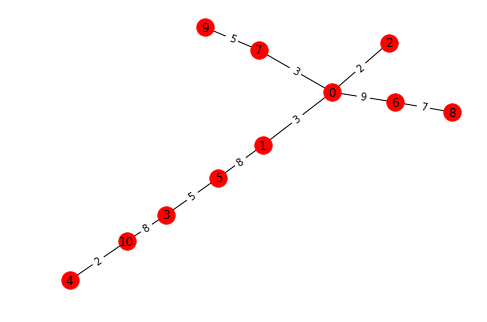

In [33]:
pintaGrafica(kruskal(g))

In [512]:
g = nx.Graph()

In [513]:
nodos=[('A','B',6), 
 ('B','C',9),
 ('B','G',12),
 ('B','E',7),
 ('C','D',4),
 ('C','E',5),
 ('D','I',14),
 ('D','E',6),
 ('D','H',8),
 ('I','L',4),
 ('I','H',9),
 ('L','K',3),
 ('L','H',14),
 ('K','J',10),
 ('K','H',12),
 ('K','G',7),
 ('J','F',11),
 ('J','G',8),
 ('F','A',5),
 ('F','G',4),
 ('F','E',8),
 ('E','G',5),
 ('G','H',5),
 ('H','E',7)]
nodos = [ (u,v,{'weight':w}) for u,v,w in nodos]
nodos

[('A', 'B', {'weight': 6}),
 ('B', 'C', {'weight': 9}),
 ('B', 'G', {'weight': 12}),
 ('B', 'E', {'weight': 7}),
 ('C', 'D', {'weight': 4}),
 ('C', 'E', {'weight': 5}),
 ('D', 'I', {'weight': 14}),
 ('D', 'E', {'weight': 6}),
 ('D', 'H', {'weight': 8}),
 ('I', 'L', {'weight': 4}),
 ('I', 'H', {'weight': 9}),
 ('L', 'K', {'weight': 3}),
 ('L', 'H', {'weight': 14}),
 ('K', 'J', {'weight': 10}),
 ('K', 'H', {'weight': 12}),
 ('K', 'G', {'weight': 7}),
 ('J', 'F', {'weight': 11}),
 ('J', 'G', {'weight': 8}),
 ('F', 'A', {'weight': 5}),
 ('F', 'G', {'weight': 4}),
 ('F', 'E', {'weight': 8}),
 ('E', 'G', {'weight': 5}),
 ('G', 'H', {'weight': 5}),
 ('H', 'E', {'weight': 7})]

In [514]:
g.add_edges_from(nodos)

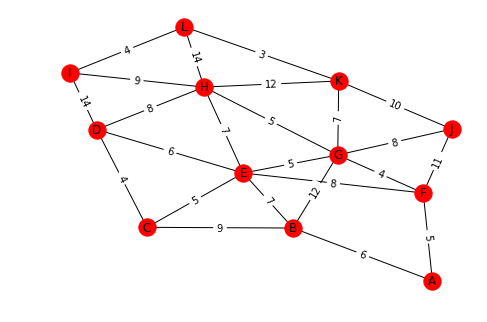

In [515]:
pintaGrafica(g)

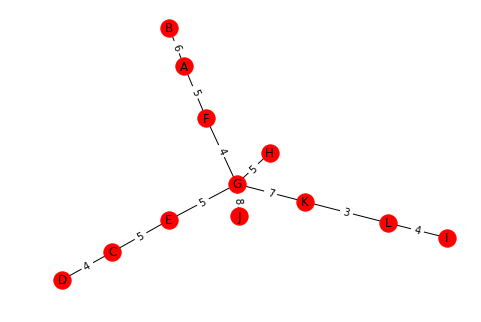

In [516]:
pintaGrafica(prim(g))

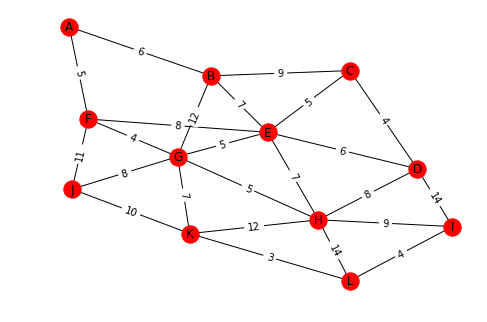

In [517]:
pintaGrafica(g)

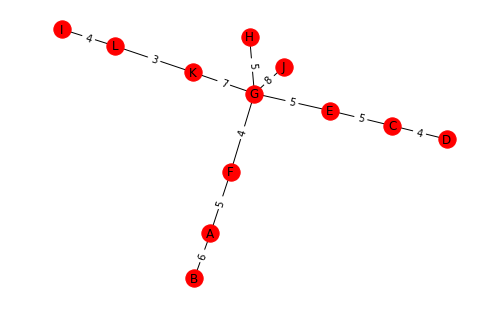

In [518]:
pintaGrafica(kruskal(g))

In [519]:
for i in g.edges(data=True):
    print(i)

('A', 'B', {'weight': 6})
('A', 'F', {'weight': 5})
('B', 'C', {'weight': 9})
('B', 'G', {'weight': 12})
('B', 'E', {'weight': 7})
('C', 'D', {'weight': 4})
('C', 'E', {'weight': 5})
('G', 'K', {'weight': 7})
('G', 'J', {'weight': 8})
('G', 'F', {'weight': 4})
('G', 'E', {'weight': 5})
('G', 'H', {'weight': 5})
('E', 'D', {'weight': 6})
('E', 'F', {'weight': 8})
('E', 'H', {'weight': 7})
('D', 'I', {'weight': 14})
('D', 'H', {'weight': 8})
('I', 'L', {'weight': 4})
('I', 'H', {'weight': 9})
('H', 'L', {'weight': 14})
('H', 'K', {'weight': 12})
('L', 'K', {'weight': 3})
('K', 'J', {'weight': 10})
('J', 'F', {'weight': 11})


In [520]:
wiri=[(u,v,w) for u,v,w in g.edges(data=True)]
wiri

[('A', 'B', {'weight': 6}),
 ('A', 'F', {'weight': 5}),
 ('B', 'C', {'weight': 9}),
 ('B', 'G', {'weight': 12}),
 ('B', 'E', {'weight': 7}),
 ('C', 'D', {'weight': 4}),
 ('C', 'E', {'weight': 5}),
 ('G', 'K', {'weight': 7}),
 ('G', 'J', {'weight': 8}),
 ('G', 'F', {'weight': 4}),
 ('G', 'E', {'weight': 5}),
 ('G', 'H', {'weight': 5}),
 ('E', 'D', {'weight': 6}),
 ('E', 'F', {'weight': 8}),
 ('E', 'H', {'weight': 7}),
 ('D', 'I', {'weight': 14}),
 ('D', 'H', {'weight': 8}),
 ('I', 'L', {'weight': 4}),
 ('I', 'H', {'weight': 9}),
 ('H', 'L', {'weight': 14}),
 ('H', 'K', {'weight': 12}),
 ('L', 'K', {'weight': 3}),
 ('K', 'J', {'weight': 10}),
 ('J', 'F', {'weight': 11})]

In [521]:
h=nx.Graph()
h.add_nodes_from(g)

In [522]:
len([i for i in nx.connected_components(h) if(minAr[0] in set(i) or minAr[1] in set(i))])==2

True

In [ ]:
pintaGrafica(h)

In [ ]:
minAr = min(wiri, key=lambda t:t[2]['weight'])
minAr

In [ ]:

def kruskal(g):
    #crea la grafica resp
    resp = nx.Graph()
    resp.add_nodes_from(g.nodes())
    aristas = [(u,v,w) for u,v,w in g.edges(data=True)]
    
    while(not nx.is_connected(resp) and len(aristas) > 0):
        minAr = min(aristas, key=lambda t:t[2]['weight'])
        aristas.remove(minAr)
        if(len([i for i in nx.connected_components(resp) if(minAr[0] in set(i) or minAr[1] in set(i))])>1):
            resp.add_nodes_from([minAr])
    return resp
          